<a href="https://colab.research.google.com/github/jma428/analyticshub/blob/main/Project3_Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import lasso_path
from sklearn import metrics

In [3]:
#Data collection and Processing
#Loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [6]:
#Inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
#Checking the number of rows and columns
car_dataset.shape

(301, 9)

In [9]:
#getting the information about the datasets
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
#checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
#checking the distributon of categorical data
print(car_dataset.Fuel_Type.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [14]:
#Encoding the categorical data
#Encoding the 'Fuel Type Column'
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
#Encoding 'Seller_Type' Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
#Encoding 'Transmission' Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [15]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [16]:
#Splitting the data into Training and Test data
x = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=car_dataset['Selling_Price']

In [18]:
print (x)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


In [19]:
#Splitting Training and Test Data
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.1,random_state = 2)


In [20]:
#Model Training
#1.Linear Regression
#Loading the Linear Regression Model
lin_reg = LinearRegression()

In [21]:
lin_reg.fit(x_train,y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#Model Evaluation
#!.Prediction on training data
training_data_prediction = lin_reg.predict(x_train)

In [23]:
#R squared erroe
error_score = metrics.r2_score(y_train,training_data_prediction)
print('R squared error',error_score)

R squared error 0.8799451660493716


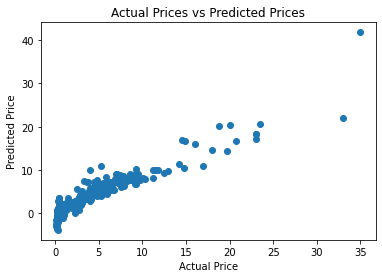

In [24]:
#Visualize the actual prices and predicted prices
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [25]:
#!.Prediction on test data
test_data_prediction = lin_reg.predict(x_test)

In [26]:
#R squared erroe
error_score = metrics.r2_score(y_test,test_data_prediction)
print('R squared error',error_score)

R squared error 0.8365766715027014


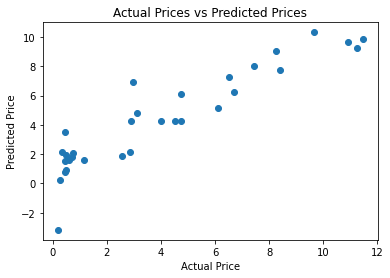

In [27]:
#Visualize the actual prices and predicted prices
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()